In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mass import MassSpectrum
from mass import VanKrevelen
from mass import Tmds
from brutto_generator import brutto_gen

/Users/av/Yandex.Disk.localized/Work/prog/masslib/mass.py:14: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes as inset_axes_func


#### Load spectrum

Assign with minimal error - 0.25 for more reliable results

Show initial vk

/Users/av/Yandex.Disk.localized/Work/prog/masslib/mass.py:650: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.table["O/C"] = self.table["O"] / self.table["C"]
/Users/av/Yandex.Disk.localized/Work/prog/masslib/mass.py:653: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.table["H/C"] = self.table["H"] / self.table["C"]
/Users/av/Yandex.Disk.localized/Work/prog/masslib/mass.py:672: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

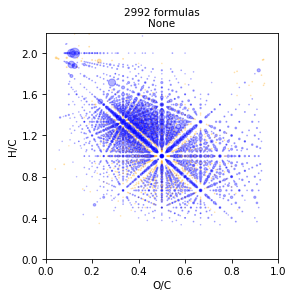

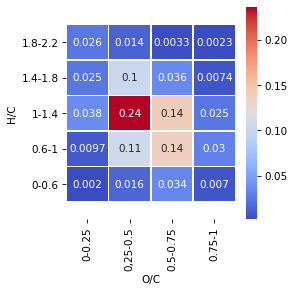

In [2]:
spec = MassSpectrum().load('data/test.txt', mapper={'mass':'mass','intensity':'intensity'}, sep=',', take_columns=['mass','intensity'])
gdf = brutto_gen(elems={'C':(1,40),'H':(0,80), 'O':(0,40),'N':(0,2)})
spec = spec.assign(generated_bruttos_table=gdf, rel_error=0.25)
vk = VanKrevelen(spec.table).draw_scatter(nitrogen=True)
vk = VanKrevelen(spec.table).squares()

#### Caclculate Total mass difference statistic (TMDS)

In [3]:
tmds_spec = Tmds().calc(spec, p=0.2) #by varifiy p-value we can choose how much mass-diff we will take
tmds_spec = tmds_spec.assign(gdf={'C':(-1,20),'H':(-4,40), 'O':(-1,20),'N':(0,1)})
tmds_spec = tmds_spec.calculate_mass()
tmds_spec.table

,C,H,O,N,assign,mass_diff,probability,calculated_mass
0,1.0,4.0,-1.0,0.0,1.0,0.036,0.842758,0.036385
1,-1.0,-2.0,1.0,0.0,1.0,1.979,0.866567,1.979265
2,0.0,2.0,0.0,0.0,1.0,2.016,0.898313,2.015650
3,1.0,6.0,-1.0,0.0,1.0,2.052,0.728175,2.052035
4,2.0,-4.0,-1.0,0.0,1.0,3.974,0.431548,3.973785
...,...,...,...,...,...,...,...,...
961,12.0,14.0,6.0,0.0,1.0,254.079,0.233135,254.079040
962,13.0,18.0,5.0,0.0,1.0,254.115,0.219742,254.115425
963,11.0,12.0,7.0,0.0,1.0,256.058,0.208333,256.058305
964,12.0,16.0,6.0,0.0,1.0,256.095,0.214782,256.094690


        C     H    O    N  assign  mass_diff  probability  calculated_mass
0     1.0   4.0 -1.0  0.0     1.0      0.036     0.842758         0.036385
1    -1.0  -2.0  1.0  0.0     1.0      1.979     0.866567         1.979265
2     0.0   2.0  0.0  0.0     1.0      2.016     0.898313         2.015650
3     1.0   6.0 -1.0  0.0     1.0      2.052     0.728175         2.052035
4     2.0  -4.0 -1.0  0.0     1.0      3.974     0.431548         3.973785
..    ...   ...  ...  ...     ...        ...          ...              ...
961  12.0  14.0  6.0  0.0     1.0    254.079     0.233135       254.079040
962  13.0  18.0  5.0  0.0     1.0    254.115     0.219742       254.115425
963  11.0  12.0  7.0  0.0     1.0    256.058     0.208333       256.058305
964  12.0  16.0  6.0  0.0     1.0    256.095     0.214782       256.094690
965  13.0  14.0  6.0  0.0     1.0    266.079     0.203373       266.079040

[966 rows x 8 columns]


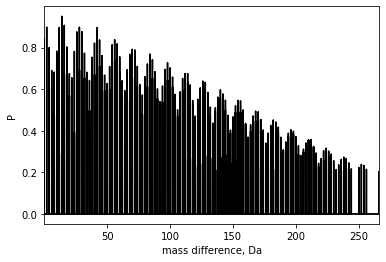

In [4]:
tmds_spec.draw()

#### Assigne by TMDS. It is takes a lot of times

In [4]:
spec = spec.assign_by_tmds(tmds_spec)
#show percent of process complete

0.0 %
0.1 %
0.2 %
0.3 %
0.4 %
0.5 %
0.6 %
0.7 %
0.8 %
0.9 %
1.0 %
1.1 %
1.2 %
1.3 %
1.4 %
1.6 %
1.7 %
1.8 %
1.9 %
2.0 %
2.1 %
2.2 %
2.3 %
2.4 %
2.5 %
2.6 %
2.7 %
2.8 %
2.9 %
3.0 %
3.1 %
3.2 %
3.3 %
3.4 %
3.5 %
3.6 %
3.7 %
3.8 %
3.9 %
4.0 %
4.1 %
4.2 %
4.3 %
4.5 %
4.6 %
4.7 %
4.8 %
4.9 %
5.0 %
5.1 %
5.2 %
5.3 %
5.4 %
5.5 %
5.6 %
5.7 %
5.8 %
5.9 %
6.0 %
6.1 %
6.2 %
6.3 %
6.4 %
6.5 %
6.6 %
6.7 %
6.8 %
6.9 %
7.0 %
7.1 %
7.2 %
7.3 %
7.5 %
7.6 %
7.7 %
7.8 %
7.9 %
8.0 %
8.1 %
8.2 %
8.3 %
8.4 %
8.5 %
8.6 %
8.7 %
8.8 %
8.9 %
9.0 %
9.1 %
9.2 %
9.3 %
9.4 %
9.5 %
9.6 %
9.7 %
9.8 %
9.9 %
10.0 %
10.1 %
10.2 %
10.4 %
10.5 %
10.6 %
10.7 %
10.8 %
10.9 %
11.0 %
11.1 %
11.2 %
11.3 %
11.4 %
11.5 %
11.6 %
11.7 %
11.8 %
11.9 %
12.0 %
12.1 %
12.2 %
12.3 %
12.4 %
12.5 %
12.6 %
12.7 %
12.8 %
12.9 %
13.0 %
13.1 %
13.3 %
13.4 %
13.5 %
13.6 %
13.7 %
13.8 %
13.9 %
14.0 %
14.1 %
14.2 %
14.3 %
14.4 %
14.5 %
14.6 %
14.7 %
14.8 %
14.9 %
15.0 %
15.1 %
15.2 %
15.3 %
15.4 %
15.5 %
15.6 %
15.7 %
15.8 %
15.9 %
16.0 %
16.1 

#### Look result

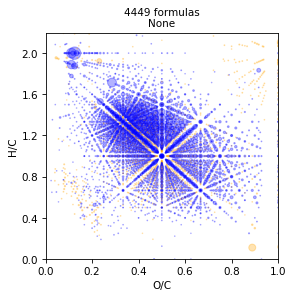

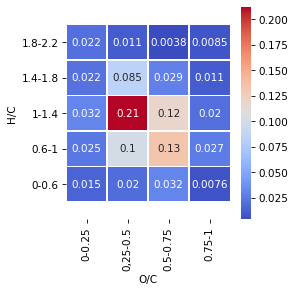

In [5]:
vk = VanKrevelen(spec.table).draw_scatter(nitrogen=True)
vk = VanKrevelen(spec.table).squares()

#### Without TMDS and rel_error 0.5 ppm

/Users/av/Yandex.Disk.localized/Work/prog/masslib/mass.py:650: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.table["O/C"] = self.table["O"] / self.table["C"]
/Users/av/Yandex.Disk.localized/Work/prog/masslib/mass.py:653: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.table["H/C"] = self.table["H"] / self.table["C"]
/Users/av/Yandex.Disk.localized/Work/prog/masslib/mass.py:672: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

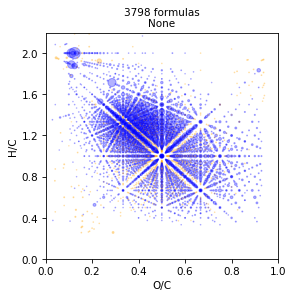

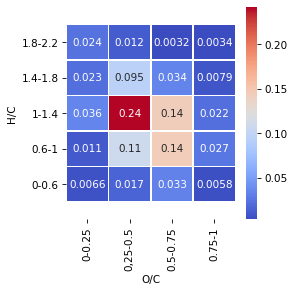

In [6]:
spec2 = MassSpectrum().load('data/test.txt', mapper={'mass':'mass','intensity':'intensity'}, sep=',', take_columns=['mass','intensity'])
gdf = brutto_gen(elems={'C':(1,40),'H':(0,80), 'O':(0,40),'N':(0,3)})
spec2 = spec2.assign(generated_bruttos_table=gdf, rel_error=0.5)
vk = VanKrevelen(spec2.table).draw_scatter(nitrogen=True)
vk = VanKrevelen(spec2.table).squares()